In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
ds = pd.read_csv("D:\PROJECTS\CLASSIFICATION\gender classification with habits\Data Set.csv")
X = ds.drop("Gender" , axis =1)
y= ds.Gender

#**checking for basic and mandatory insigts about our data**

In [4]:
X.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink
0,Cool,Rock,Vodka,7UP/Sprite
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi
2,Warm,Rock,Wine,Coca Cola/Pepsi
3,Warm,Folk/Traditional,Whiskey,Fanta
4,Cool,Rock,Vodka,Coca Cola/Pepsi


In [5]:
X.shape

(66, 4)

**checking for uniqe values and other details**

In [6]:
ds.describe(include = [np.object]).T.style.set_properties(**{'background-color':'white',
                                     'color': 'black',
                                      'border-color':'black' })

C:\Users\DEEL\AppData\Local\Temp\ipykernel_7052\934551437.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ds.describe(include = [np.object]).T.style.set_properties(**{'background-color':'white',


,count,unique,top,freq
Favorite Color,66,3,Cool,37
Favorite Music Genre,66,7,Rock,19
Favorite Beverage,66,6,Doesn't drink,14
Favorite Soft Drink,66,4,Coca Cola/Pepsi,32
Gender,66,2,F,33


**check for missing values**

In [7]:
X.isnull().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
dtype: int64

*if we would have found missing data we would have used*
> https://www.kaggle.com/code/alexisbcook/missing-values

# **NOW DIVIDING DATA SET INTO OBJECT COLUMNSA AND NUMERICAL COLUMNS**
> mandatory to avoid un-necessary errors and clear vision about our data

In [8]:
object_cols = [col for col in X.columns if X[col].dtype==object]
print("OBJECT COLUMNS ARE" , object_cols)

num_cols = list(set(X.columns) - set(object_cols))
print("NUMERICAL COLUMNS ARE" , num_cols)    

OBJECT COLUMNS ARE ['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage', 'Favorite Soft Drink']
NUMERICAL COLUMNS ARE []


In [9]:
# ds["Favorite Color"].unique()


# for i in ds.columns:
#     print(i)
#     for j in ds["i"].unique() :
#         print(j)

        
# for k in ds["Favorite Color"].unique():
#     print(k)
#     ds[ds["Favorite Color"] == "Cool"]["Gender"].value_counts(normalize=True)

# **just some corelations and insigts that can be seen by human eyes directly**
> helps in taking mandatory decisions 

In [10]:
ds[ds["Favorite Color"] == "Cool"]["Gender"].value_counts(normalize=True)


M    0.540541
F    0.459459
Name: Gender, dtype: float64

In [11]:
ds[ds["Favorite Color"] == "Warm"]["Gender"].value_counts(normalize=True)


F    0.590909
M    0.409091
Name: Gender, dtype: float64

In [12]:
ds[ds["Favorite Color"] == "Neutral"]["Gender"].value_counts(normalize=True)



M    0.571429
F    0.428571
Name: Gender, dtype: float64

In [13]:
# round(ds.groupby("Favorite Color")["Gender"].mean(), 2).sort_values(ascending=False)
# describing percentage vount in different values of feature

In [14]:
fig = px.histogram(data_frame=ds, x="Favorite Color", color="Gender", width=400, height=400)
fig.show()

In [15]:
fig = px.histogram(data_frame=ds, x="Favorite Music Genre", color="Gender", width=400, height=400)
fig.show()

In [16]:
fig = px.histogram(data_frame=ds, x="Favorite Beverage", color="Gender", width=400, height=400)
fig.show()

In [17]:
ds["Gender"] = ds["Gender"].map(lambda x: 0 if x=="F" else 1)

round(ds.groupby("Favorite Soft Drink")["Gender"].mean(), 2).sort_values(ascending=False)


Favorite Soft Drink
Other              0.71
Fanta              0.57
Coca Cola/Pepsi    0.47
7UP/Sprite         0.38
Name: Gender, dtype: float64

In [18]:
fig = px.histogram(data_frame=ds, x="Favorite Soft Drink", color="Gender", width=400, height=400)
fig.show()

**we could have used this code below in all our operations but i purposely avoided to provide you a better understanding**


In [19]:
round(ds.groupby("Favorite Color")["Gender"].mean(), 2).sort_values(ascending=False)
# describing percentage vount in different values of feature

Favorite Color
Neutral    0.57
Cool       0.54
Warm       0.41
Name: Gender, dtype: float64

*similar analytics can be performed when trying manual corellation between categoral items when in classification*

# **now converting categorial data into numeric value for further EDA and calculations**

In [20]:
encoder = LabelEncoder()
project_data = ds.copy()
project_data['Favorite_Color_Transformed'] = encoder.fit_transform(ds['Favorite Color'])
project_data['Favorite_Music_Genre_Transformed'] = encoder.fit_transform(ds['Favorite Music Genre'])
project_data['Favorite_Beverage_Transformed'] = encoder.fit_transform(ds['Favorite Beverage'])
project_data['Favorite_Soft_Drink_Transformed'] = encoder.fit_transform(ds['Favorite Soft Drink'])
project_data['Gender_Transformed'] = encoder.fit_transform(ds['Gender'])

**above is label encoding from**
> https://www.kaggle.com/code/alexisbcook/categorical-variables

In [21]:
project_data.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender,Favorite_Color_Transformed,Favorite_Music_Genre_Transformed,Favorite_Beverage_Transformed,Favorite_Soft_Drink_Transformed,Gender_Transformed
0,Cool,Rock,Vodka,7UP/Sprite,0,0,6,3,0,0
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,0,1,2,3,1,0
2,Warm,Rock,Wine,Coca Cola/Pepsi,0,2,6,5,1,0
3,Warm,Folk/Traditional,Whiskey,Fanta,0,2,1,4,2,0
4,Cool,Rock,Vodka,Coca Cola/Pepsi,0,0,6,3,1,0


In [22]:
training_data = project_data.drop(["Favorite Color" , "Favorite Music Genre", "Favorite Beverage", "Favorite Soft Drink" , "Gender"], axis= 1  )
training_data.head()
project_data.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender,Favorite_Color_Transformed,Favorite_Music_Genre_Transformed,Favorite_Beverage_Transformed,Favorite_Soft_Drink_Transformed,Gender_Transformed
0,Cool,Rock,Vodka,7UP/Sprite,0,0,6,3,0,0
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,0,1,2,3,1,0
2,Warm,Rock,Wine,Coca Cola/Pepsi,0,2,6,5,1,0
3,Warm,Folk/Traditional,Whiskey,Fanta,0,2,1,4,2,0
4,Cool,Rock,Vodka,Coca Cola/Pepsi,0,0,6,3,1,0


*finding numerical correlation between various features that may be left unseen by human eyes*

<AxesSubplot:>

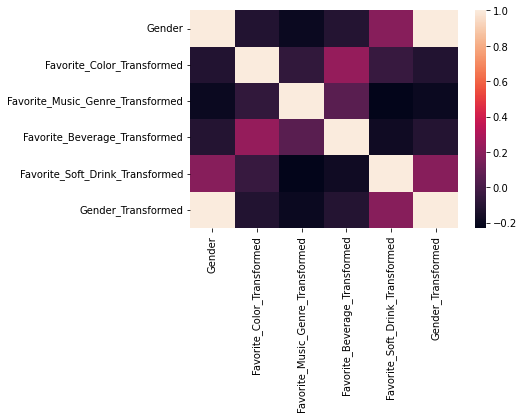

In [23]:
corr = project_data.corr()
sns.heatmap(corr)

<AxesSubplot:>

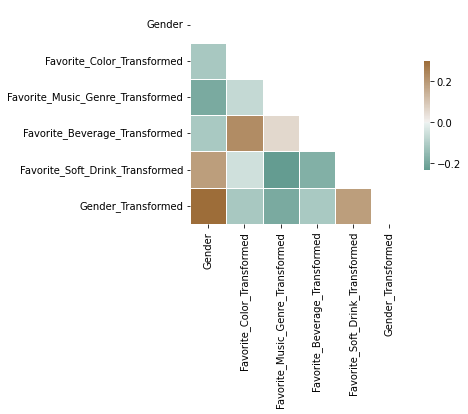

In [24]:
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(170, 45, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [25]:
X = project_data.drop(['Favorite Color','Favorite Music Genre','Favorite Beverage','Favorite Soft Drink','Gender','Gender_Transformed'], axis=1)
Y = project_data['Gender']

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

# logistic regression

In [27]:
# cheching logistic regression
logisticRegression_model = LogisticRegression()
logisticRegression_model.fit(X_train,Y_train)
predict = logisticRegression_model.predict(X_test)

print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

           0       0.55      0.60      0.57        10
           1       0.56      0.50      0.53        10

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.55        20
weighted avg       0.55      0.55      0.55        20



# SVC MODEL

In [28]:
svc_model = SVC()
svc_model.fit(X_train,Y_train)
predict = svc_model.predict(X_test)

print(classification_report(Y_test,predict))


              precision    recall  f1-score   support

           0       0.58      0.70      0.64        10
           1       0.62      0.50      0.56        10

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.60      0.60      0.60        20



# Decision Tree Classifier

In [29]:
decisionTreeClassifier_model = DecisionTreeClassifier()
decisionTreeClassifier_model.fit(X_train,Y_train)
predict = decisionTreeClassifier_model.predict(X_test)

print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

           0       0.67      0.60      0.63        10
           1       0.64      0.70      0.67        10

    accuracy                           0.65        20
   macro avg       0.65      0.65      0.65        20
weighted avg       0.65      0.65      0.65        20



# K-Neighbors Classifier

In [30]:
kNeighborsClassifier_model = KNeighborsClassifier()
kNeighborsClassifier_model.fit(X_train,Y_train)
predict = kNeighborsClassifier_model.predict(X_test)

print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

           0       0.55      0.60      0.57        10
           1       0.56      0.50      0.53        10

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.55        20
weighted avg       0.55      0.55      0.55        20



# Random Forest Classifier

In [31]:
randomForestClassifier_model = RandomForestClassifier()
randomForestClassifier_model.fit(X_train,Y_train)
predict = randomForestClassifier_model.predict(X_test)

print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

           0       0.58      0.70      0.64        10
           1       0.62      0.50      0.56        10

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.60      0.60      0.60        20



# Gradient Boosting Classifier

In [32]:
gradientBoostingClassifier_model = GradientBoostingClassifier()
gradientBoostingClassifier_model.fit(X_train,Y_train)
predict = gradientBoostingClassifier_model.predict(X_test)

print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

           0       0.67      0.60      0.63        10
           1       0.64      0.70      0.67        10

    accuracy                           0.65        20
   macro avg       0.65      0.65      0.65        20
weighted avg       0.65      0.65      0.65        20



**SINCE THE BEST ACCURACY IS WITH GRADIENT BOOSTING CLASSIFIER**

In [33]:
# importing pikle  library that will use to stroe the pretrained model
# so that we dont have to tran the model again and again
import pickle

In [34]:
final_model = GradientBoostingClassifier()
final_model.fit(X,Y)


GradientBoostingClassifier()

**exporting the model**

In [35]:

predict = final_model.predict(X)
k= final_model.predict_proba(X)

pickle.dump(final_model,open('final_model.pkl','wb'))
model=pickle.load(open('final_model.pkl','rb'))
